#This script make unrar dataset and then create mua and data h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Extracting rar files
#In case of rar files
#file_path="/content/drive/MyDrive/DriveUploader/mua_21_.rar"
#file_path='/content/drive/MyDrive/DriveUploader/mua_22_.rar'
#file_path='/content/drive/MyDrive/DriveUploader/mua_23_.rar'
#file_path='/content/drive/MyDrive/DriveUploader/mua_24_.rar'
#file_path='/content/drive/MyDrive/DriveUploader/mua_25.rar'
#file_path='/content/drive/MyDrive/DriveUploader/data_21_.rar'
#file_path='/content/drive/MyDrive/DriveUploader/data_22_.rar'
#file_path='/content/drive/MyDrive/DriveUploader/data_23_.rar'
#file_path='/content/drive/MyDrive/DriveUploader/data_24_.rar'
file_path='/content/drive/MyDrive/DriveUploader/data_25.rar'
!unrar x '$file_path' "/content/drive/MyDrive/dataset"

In [ ]:
from scipy.io import loadmat
import pandas as pd
import h5py

In [ ]:
import glob
mua_11list = glob.glob("/content/drive/MyDrive/dataset/mua_11/mua*******.mat")
mua_12list = glob.glob("/content/drive/MyDrive/dataset/mua_12/mua*******.mat")
mua_13list = glob.glob("/content/drive/MyDrive/dataset/mua_13/mua*******.mat")
mua_14list = glob.glob("/content/drive/MyDrive/dataset/mua_14/mua*******.mat")
data_11list = glob.glob("/content/drive/MyDrive/dataset/data_11/data*******.mat")
data_12list = glob.glob("/content/drive/MyDrive/dataset/data_12/data*******.mat")
data_13list = glob.glob("/content/drive/MyDrive/dataset/data_13/data*******.mat")
data_14list = glob.glob("/content/drive/MyDrive/dataset/data_14/data*******.mat")

mua_21list = glob.glob("/content/drive/MyDrive/dataset/mua_21/mua*******.mat")
mua_22list = glob.glob("/content/drive/MyDrive/dataset/mua_22/mua*******.mat")
mua_23list = glob.glob("/content/drive/MyDrive/dataset/mua_23/mua*******.mat")
mua_24list = glob.glob("/content/drive/MyDrive/dataset/mua_24/mua*******.mat")
mua_25list = glob.glob("/content/drive/MyDrive/dataset/mua_25/mua*******.mat")
data_21list = glob.glob("/content/drive/MyDrive/dataset/data_21/data*******.mat")
data_22list = glob.glob("/content/drive/MyDrive/dataset/data_22/data*******.mat")
data_23list = glob.glob("/content/drive/MyDrive/dataset/data_23/data*******.mat")
data_24list = glob.glob("/content/drive/MyDrive/dataset/data_24/data*******.mat")
data_25list = glob.glob("/content/drive/MyDrive/dataset/data_25/data*******.mat")


In [ ]:
mua_11list.sort(key=lambda x:int(x[42:47]))
mua_12list.sort(key=lambda x:int(x[42:47]))
mua_13list.sort(key=lambda x:int(x[42:47]))
mua_14list.sort(key=lambda x:int(x[42:47]))

data_11list.sort(key=lambda x:int(x[44:49]))
data_12list.sort(key=lambda x:int(x[44:49]))
data_13list.sort(key=lambda x:int(x[44:49]))
data_14list.sort(key=lambda x:int(x[44:49]))

mua_21list.sort(key=lambda x:int(x[50:55]))
mua_22list.sort(key=lambda x:int(x[50:55]))
mua_23list.sort(key=lambda x:int(x[50:55]))
mua_24list.sort(key=lambda x:int(x[50:55]))
mua_25list.sort(key=lambda x:int(x[50:55]))

data_21list.sort(key=lambda x:int(x[52:57]))
data_22list.sort(key=lambda x:int(x[52:57]))
data_23list.sort(key=lambda x:int(x[52:57]))
data_24list.sort(key=lambda x:int(x[52:57]))
data_25list.sort(key=lambda x:int(x[52:57]))

In [ ]:
import pandas as pd
import re 
import numpy as np

In [ ]:
def mua_read(mat_file, name, index):
  mat=loadmat(mat_file)
  mat_list=[[element for element in upperElement] for upperElement in mat[name]]
  df=pd.DataFrame(mat_list)
  whol_img=df.to_numpy()
  whol_img=whol_img.reshape(64,64,64)
  img=whol_img[:,index,:]
  return img

In [ ]:
#@title Visualizing data
mat_file='/content/drive/MyDrive/dataset/mua_21/muaTypeOne (13100).mat'
name='mua_save'
index=25
d=mua_read(mat_file, name, index)
import matplotlib.pyplot as plt

plt.gca()
e=d.reshape(64,64)
plt.imshow(e)
plt.colorbar()

In [ ]:
mua_11=[]
for file in mua_11list:
  temp_two=mua_read(file,'mua',25)
  mua_11.append(temp_two.reshape(4096,1))
mua_11=np.asarray(mua_11)
print(mua_11.shape) 



(3000, 4096, 1)


In [ ]:
#@title Default title text
import h5py
h5f = h5py.File('/content/drive/MyDrive/data.h5', 'w')
h5f.create_dataset('dataset_1', data=mua_11)

<HDF5 dataset "dataset_1": shape (3000, 4096, 1), type "<f8">

In [ ]:
#@title Default title text
h5f = h5py.File('data.h5','r')
b = h5f['dataset_1'][:]
h5f.close()

#np.allclose(mua_11,b)
#b.shape

In [ ]:
mua_12=[]
for file in mua_12list:
  temp_two=mua_read(file,'mua',25)
  mua_12.append(temp_two.reshape(4096,1))
mua_12=np.asarray(mua_12)
print(mua_12.shape)

(3000, 4096, 1)


In [ ]:
import h5py
with h5py.File('/content/drive/MyDrive/data2.h5', 'w') as hf:
    hf.create_dataset("dataset_2",  data=mua_12)

In [ ]:
mua_13=[]
for file in mua_13list:
  temp_two=mua_read(file,'mua',25)
  mua_13.append(temp_two.reshape(4096,1))
mua_13=np.asarray(mua_13)
print(mua_13.shape)

(3000, 4096, 1)


In [ ]:
with h5py.File('/content/drive/MyDrive/data3.h5', 'w') as hf:
    hf.create_dataset("dataset_3",  data=mua_13)

In [ ]:
mua_14=[]
for file in mua_14list:
  temp_two=mua_read(file,'mua',25)
  mua_14.append(temp_two.reshape(4096,1))
mua_14=np.asarray(mua_14)
print(mua_14.shape)

(3000, 4096, 1)


In [ ]:
h5f = h5py.File('/content/drive/MyDrive/data.h5','r')
mua_11 = h5f['dataset_1'][:]

In [ ]:
mua_21=[]
for file in mua_21list:
  temp_two=mua_read(file,'mua_save',25)
  mua_21.append(temp_two.reshape(4096,1))
mua_21=np.asarray(mua_21)
print(mua_21.shape)

(1197, 4096, 1)


In [ ]:
mua_22=[]
for file in mua_22list:
  temp_two=mua_read(file,'mua_save',25)
  mua_22.append(temp_two.reshape(4096,1))
mua_22=np.asarray(mua_22)
print(mua_22.shape)

(1197, 4096, 1)


In [ ]:
mua_23=[]
for file in mua_23list:
  temp_two=mua_read(file,'mua_save',25)
  mua_23.append(temp_two.reshape(4096,1))
mua_23=np.asarray(mua_23)
print(mua_23.shape)

(1197, 4096, 1)


In [ ]:
mua_24=[]
for file in mua_24list:
  temp_two=mua_read(file,'mua_save',25)
  mua_24.append(temp_two.reshape(4096,1))
mua_24=np.asarray(mua_24)
print(mua_24.shape)

(1197, 4096, 1)


In [ ]:
mua_25=[]
for file in mua_25list:
  temp_two=mua_read(file,'mua_save',25)
  mua_25.append(temp_two.reshape(4096,1))
mua_25=np.asarray(mua_25)
print(mua_25.shape)

(212, 4096, 1)


In [ ]:
mua_file_1=np.concatenate((mua_11,mua_12),axis=0) 
mua_file_2=np.concatenate((mua_file_1,mua_13),axis=0)
mua_file_3=np.concatenate((mua_file_2,mua_14),axis=0)  
mua_file_4=np.concatenate((mua_file_3,mua_21),axis=0)
mua_file_5=np.concatenate((mua_file_4,mua_22),axis=0)
mua_file_6=np.concatenate((mua_file_5,mua_23),axis=0)
mua_file_7=np.concatenate((mua_file_6,mua_24),axis=0)
mua_file_8=np.concatenate((mua_file_7,mua_25),axis=0)
mua_file_8.shape

(17000, 4096, 1)

In [ ]:
with h5py.File('/content/drive/MyDrive/mua.h5', 'w') as hf:
    hf.create_dataset("mua",  data=mua_file_8)

In [ ]:
with h5py.File('/content/drive/MyDrive/mua.h5','r') as hf:
  a=hf['mua'][:]
print(a.shape) 
type(a)

(16788, 4096, 1)


numpy.ndarray

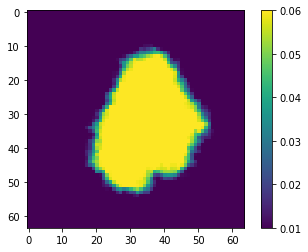

In [ ]:
a.shape
b=a[16395]
b.shape
import matplotlib.pyplot as plt

plt.gca()
c=b.reshape(64,64)
plt.imshow(c)
plt.colorbar()

In [ ]:
def data_read(mat_file, name):
  mat=loadmat(mat_file)
  mat_list=[[element for element in upperElement] for upperElement in mat[name]]
  df=pd.DataFrame(mat_list)
  label=df.to_numpy()
  return label

In [ ]:
data_11=[]
for file in data_11list:
  temp_two=data_read(file,'data')
  data_11.append(temp_two.reshape(625,1))
data_11=np.asarray(data_11)
print(data_11.shape)

(3000, 625, 1)


In [ ]:
with h5py.File('/content/drive/MyDrive/data.h5', 'w') as hf:
    hf.create_dataset("data_1",  data=data_11)

In [ ]:
data_12=[]
for file in data_12list:
  temp_two=data_read(file,'data')
  data_12.append(temp_two.reshape(625,1))
data_12=np.asarray(data_12)
print(data_12.shape)

In [ ]:
with h5py.File('/content/drive/MyDrive/data_1.h5', 'w') as hf:
    hf.create_dataset("data_2",  data=data_12)

In [ ]:
data_13=[]
for file in data_13list:
  temp_two=data_read(file,'data')
  data_13.append(temp_two.reshape(625,1))
data_13=np.asarray(data_13)
print(data_13.shape)

(3000, 625, 1)


In [ ]:
with h5py.File('/content/drive/MyDrive/data_2.h5', 'w') as hf:
    hf.create_dataset("data_3",  data=data_13)

In [ ]:
data_14=[]
for file in data_14list:
  temp_two=data_read(file,'data')
  data_14.append(temp_two.reshape(625,1))
data_14=np.asarray(data_14)
print(data_14.shape)

(3000, 625, 1)


In [ ]:
data_21=[]
for file in data_21list:
  temp_two=data_read(file,'data')
  data_21.append(temp_two.reshape(625,1))
data_21=np.asarray(data_21)
print(data_21.shape)

(1197, 625, 1)


In [ ]:
data_22=[]
for file in data_22list:
  temp_two=data_read(file,'data')
  data_22.append(temp_two.reshape(625,1))
data_22=np.asarray(data_22)
print(data_22.shape)

(1197, 625, 1)


In [ ]:
data_23=[]
for file in data_23list:
  temp_two=data_read(file,'data')
  data_23.append(temp_two.reshape(625,1))
data_23=np.asarray(data_23)
print(data_23.shape)

(1197, 625, 1)


In [ ]:
data_24=[]
for file in data_24list:
  temp_two=data_read(file,'data')
  data_24.append(temp_two.reshape(625,1))
data_24=np.asarray(data_24)
print(data_24.shape)

(1197, 625, 1)


In [ ]:
data_25=[]
for file in data_25list:
  temp_two=data_read(file,'data')
  data_25.append(temp_two.reshape(625,1))
data_25=np.asarray(data_25)
print(data_25.shape)

(212, 625, 1)


In [ ]:
data_file_1=np.concatenate((data_11,data_12),axis=0) 
data_file_2=np.concatenate((data_file_1,data_13),axis=0)
data_file_3=np.concatenate((data_file_2,data_14),axis=0) 
data_file_4=np.concatenate((data_file_3,data_21),axis=0)  
data_file_5=np.concatenate((data_file_4,data_22),axis=0) 
data_file_6=np.concatenate((data_file_5,data_23),axis=0) 
data_file_7=np.concatenate((data_file_6,data_24),axis=0) 
data_file_8=np.concatenate((data_file_7,data_25),axis=0) 
data_file_8.shape

(17000, 625, 1)

In [ ]:
with h5py.File('/content/drive/MyDrive/data.h5', 'w') as hf:
    hf.create_dataset("data",  data=data_file_8)

In [ ]:
with h5py.File('/content/drive/MyDrive/data.h5','r') as hf:
  a=hf['data'][:]
a.shape
type(a)

numpy.ndarray

In [ ]:
print(a.shape)
type(a)

(17000, 4096, 1)


numpy.ndarray

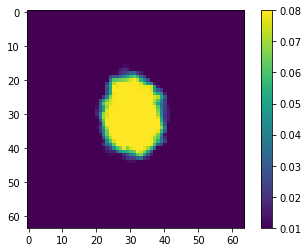

In [ ]:
b=a[11000]
b.shape
import matplotlib.pyplot as plt

plt.gca()
c=b.reshape(25,25)
plt.imshow(c)
plt.colorbar()

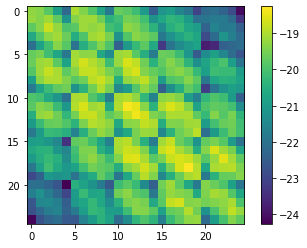

In [ ]:
b=data_12[0]
b.shape
import matplotlib.pyplot as plt

plt.gca()
c=b.reshape(25,25)
plt.imshow(c)
plt.colorbar()